In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix1
from sklearn.pipeline import Pipeline


# **Data Importing & Preprocessing**
---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn_dataset-testing-master.csv to customer_churn_dataset-testing-master.csv
Saving customer_churn_dataset-training-master.csv to customer_churn_dataset-training-master.csv


In [ ]:

w
testDF = pd.read_csv('customer_churn_dataset-testing-master.csv').copy()
trainDF = pd.read_csv('customer_churn_dataset-training-master.csv').copy()

In [ ]:
trainDF.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


**DATA OVERVIEW**
The training dataset (trainDF) has 440,833 entries and 12 columns. Here's a brief summary of the data:


*   CustomerID: Unique identifier for customers.
*   Age: Age of the customer.
*   Gender: Gender of the customer.
*   Tenure: Duration of the subscription.
*   Usage Frequency: How often the service is used.
*   Support Calls: Number of support calls made.
*   Payment Delay: Number of delayed payments.
*   Subscription Type: Type of subscription (Standard, Basic, Premium).
*   Contract Length: Length of the subscription contract.
*   Total Spend: Total amount spent by the customer.
*   Last Interaction: Days since last interaction.
*   Churn: Whether the customer has churned (0 or 1), left the subscription.






In [ ]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [ ]:
train_df = trainDF.drop(columns=['CustomerID'])
test_df = testDF.drop(columns=['CustomerID'])
train_df


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [ ]:
trainDF.head(10 )

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [ ]:
trainDF.shape
testDF.shape

(64374, 12)

Filled empty rows with the median

In [ ]:
trainDF.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


# **UNI-VARIANT ANALYSIS**

<Axes: >

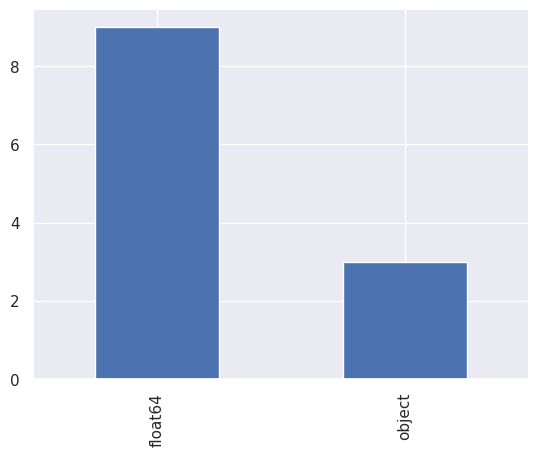

In [ ]:
trainDF.dtypes.value_counts().plot.bar()


In [ ]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [ ]:
trainDF.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [ ]:
trainDF = trainDF.dropna()
testDF = testDF.dropna()
trainDF.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [ ]:
cols = train_df.drop(columns='Churn').columns
cols

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction'],
      dtype='object')

In [ ]:
nums = trainDF.select_dtypes(include=['number']).columns
cats = trainDF.select_dtypes(include=['object']).columns


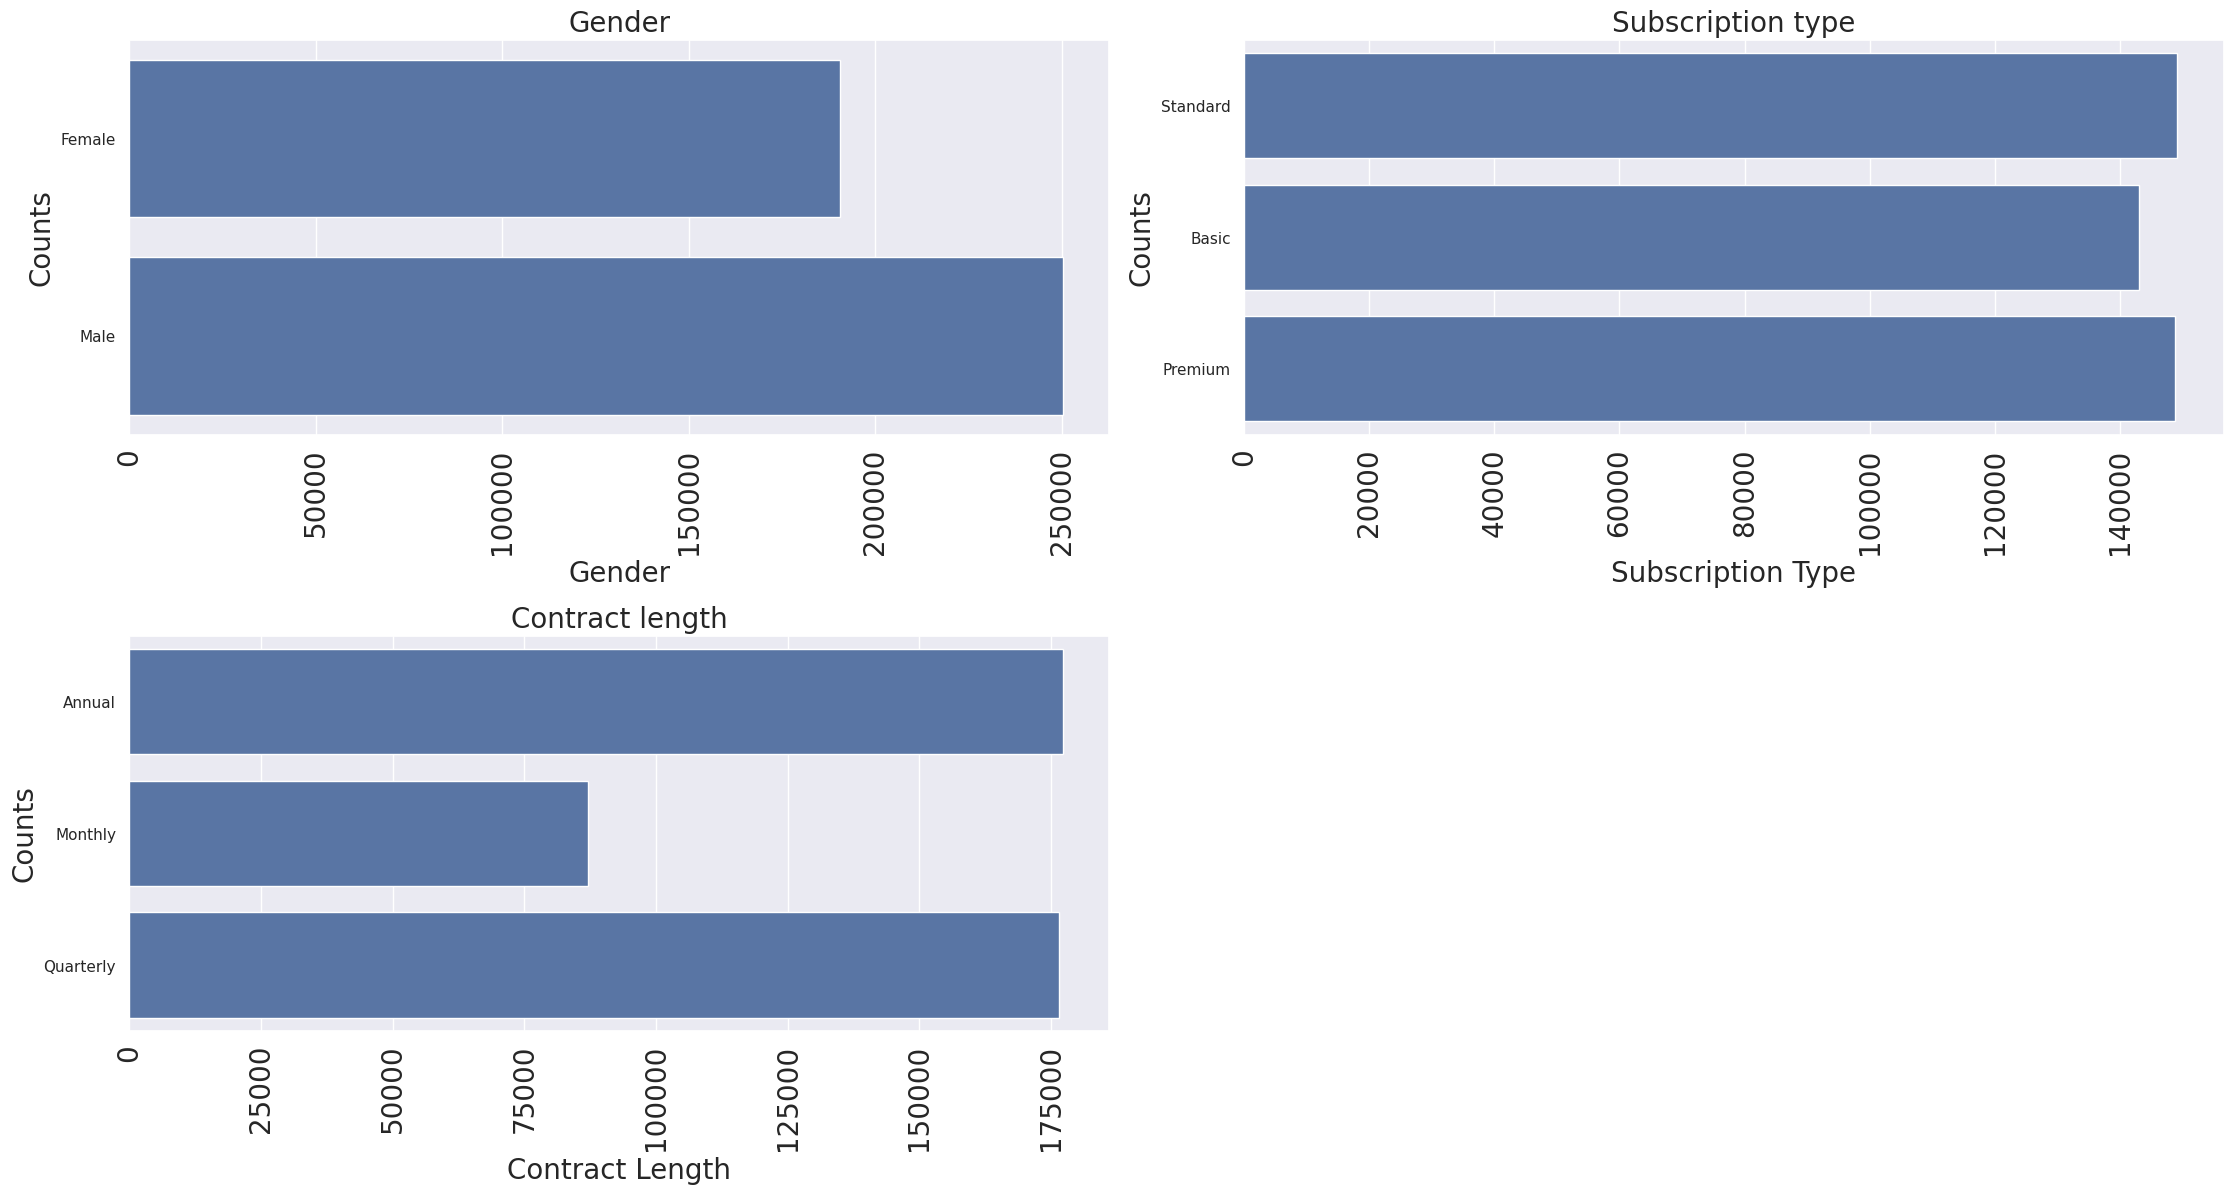

In [ ]:
fig1 = plt.figure(1, figsize=(22.5, 22.5))
i = 0

for cat in cats:
    i += 1
    ax = plt.subplot(4, 2, i)

    sns.countplot(trainDF[cat])

    ax.set_title(cat.capitalize(), fontsize=20)
    plt.xticks(rotation=90, fontsize=20)
    ax.set_ylabel('Counts', fontsize=20)
    ax.set_xlabel(cat, fontsize=20)
    plt.tight_layout()

In [ ]:
nums = nums.to_list()
cats = cats.to_list()

# **DISCRETE DATA DISTRIBUTION**

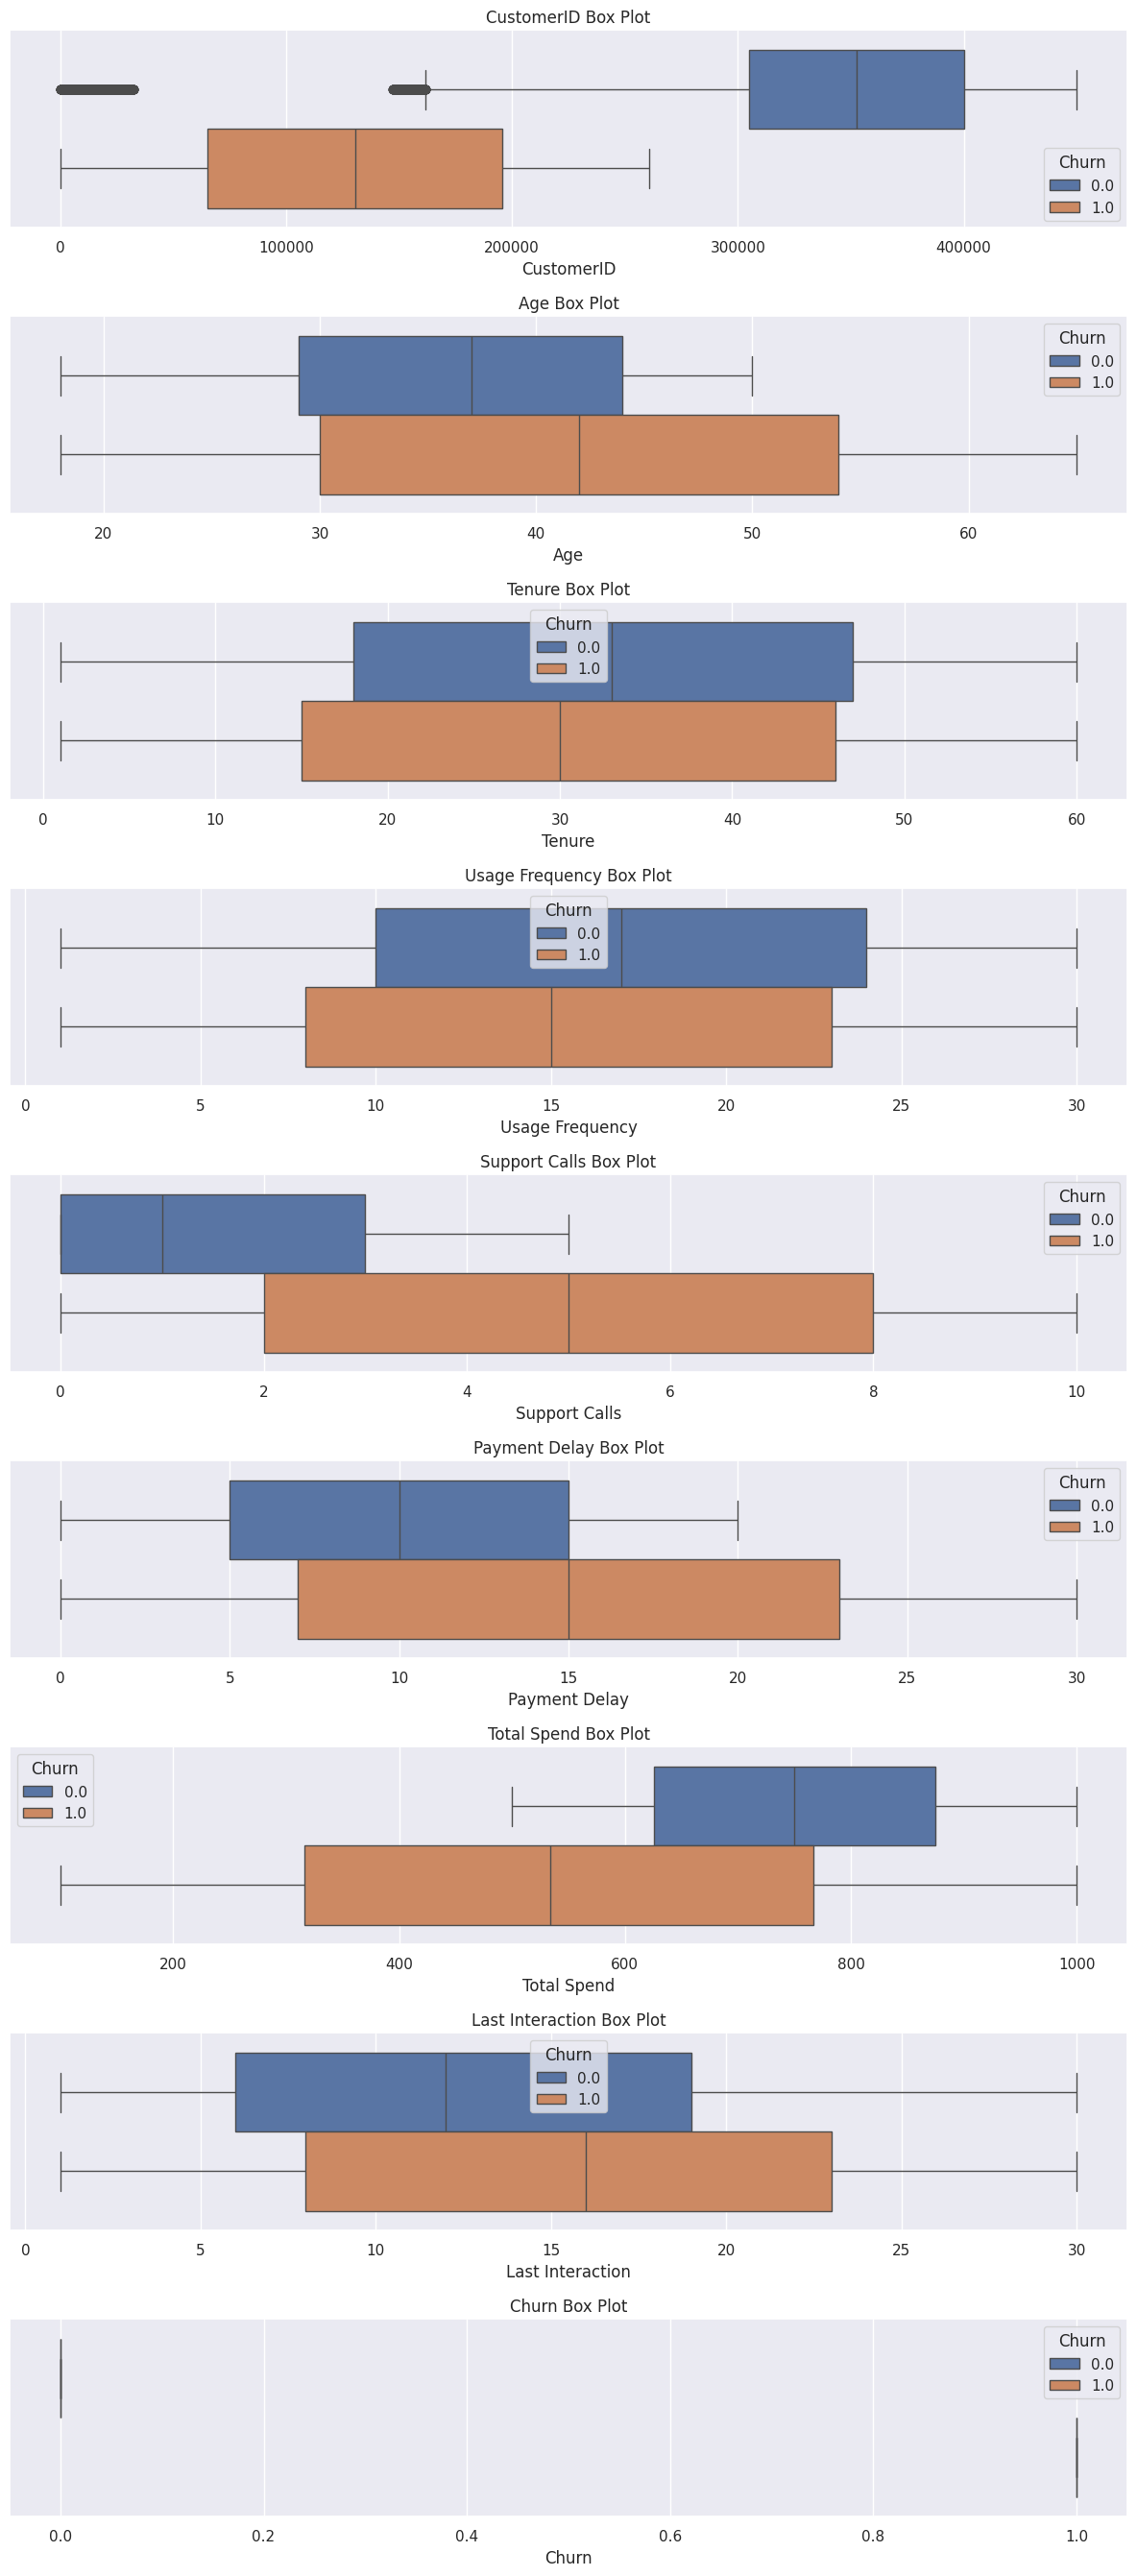

In [ ]:
fig, axes = plt.subplots(len(nums), 1, figsize=(12, 3 * len(nums)))


for i, col in enumerate(nums):
    sns.boxplot(data=trainDF, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'{col} Box Plot')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


# **Multivariate Analysis**

In [ ]:
combinations = itertools.combinations(['Subscription Type', 'Gender', 'Age'], 2)
combos = [combo for combo in combinations]

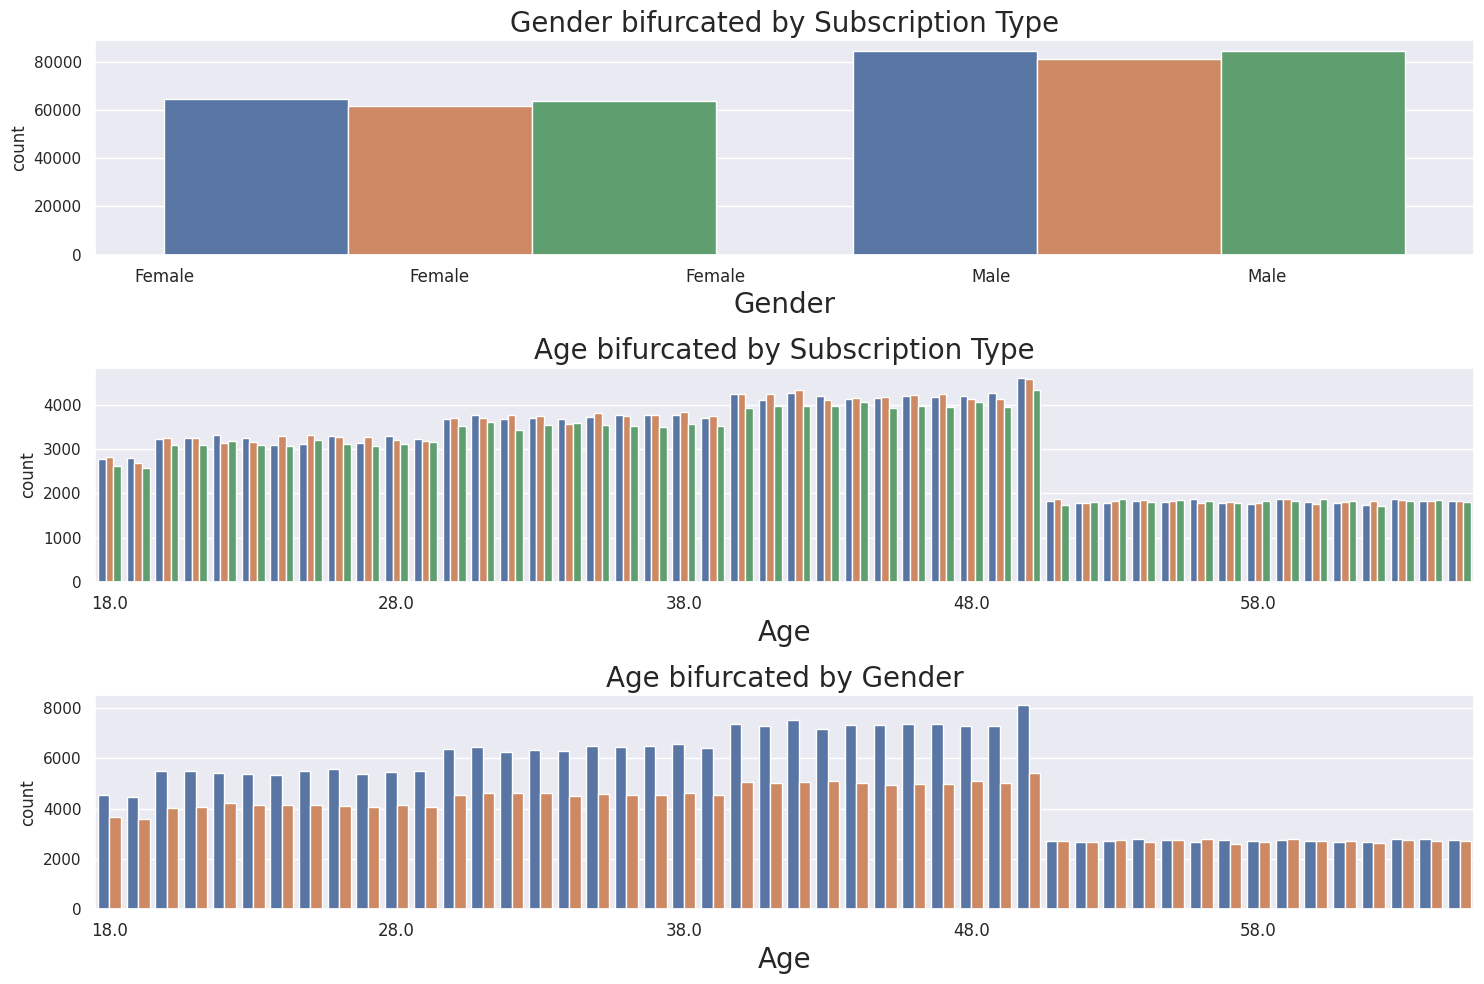

In [ ]:
from matplotlib.ticker import MaxNLocator

fig2 = plt.figure(1, figsize=(15, 10))
i = 0

for pair in combos:
    i += 1
    ax = plt.subplot(3, 1, i)
    sns.countplot(x=trainDF[pair[1]], hue=trainDF[pair[0]])
    ax.set_title(f'{pair[1]} bifurcated by {pair[0]}', fontsize=20)
    ax.set_xlabel(pair[1], fontsize=20)

    ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
    plt.xticks(fontsize=12)
    ax.get_legend().remove()
    plt.tight_layout()

**INSIGHTS**

In the first graph with gender bifurcated by subscription type, we can see that on average the female gender has less count of each subscrition type regardless of the specific type of subscription type, averaging at around 60,000 with the male gender averaging at around 80,0000. In the second graph we can see that there is a drastic decrease in all types of subscription types after the age of approximately 50 years old, with an approximately steady increase in subscription type count from ages 18 to 50. In the third graph, we can see that the male gender is on average younger than the female gender until approximately 50 years old.

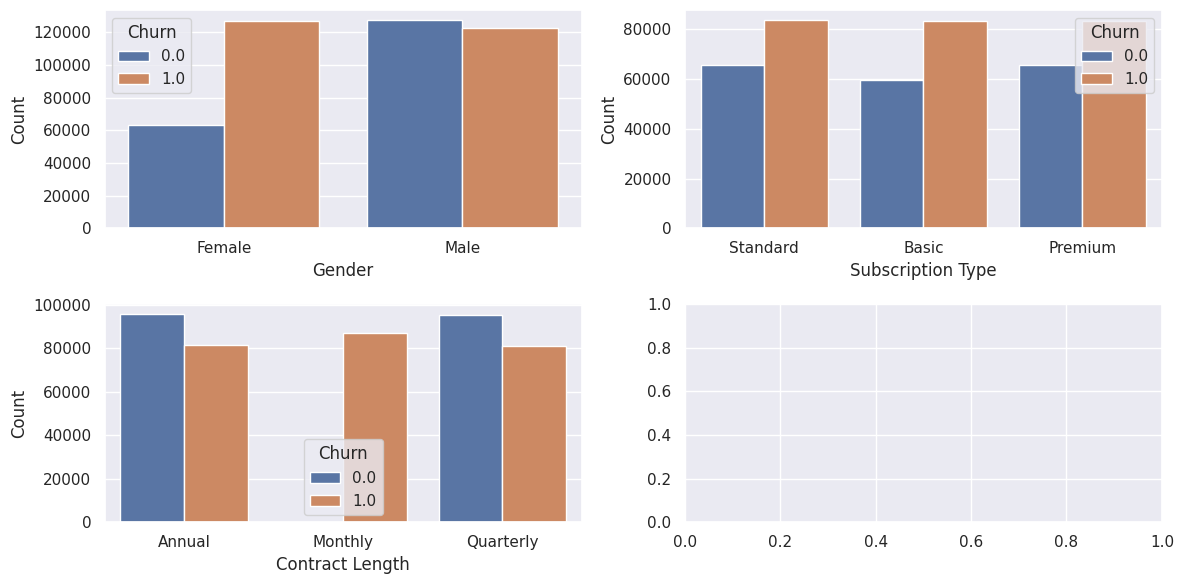

In [ ]:

fig, axes = plt.subplots(len(cats)//2+len(cats)%2, 2, figsize=(12, 6 * (len(cats)//2)))

for i, col in enumerate(cats):
    sns.countplot(x=col, data=trainDF, hue='Churn', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Count')
    axes[i//2, i%2].legend(title='Churn')

plt.tight_layout()
plt.show()

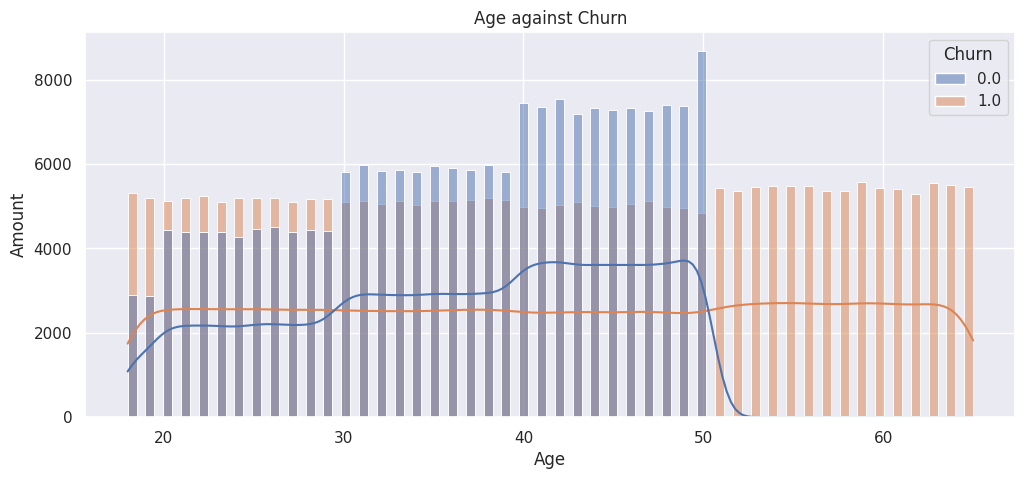

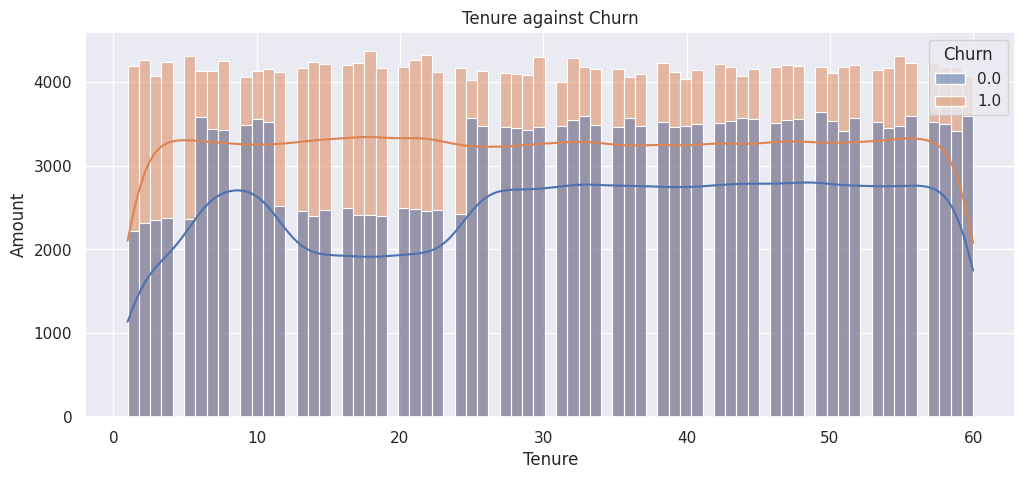

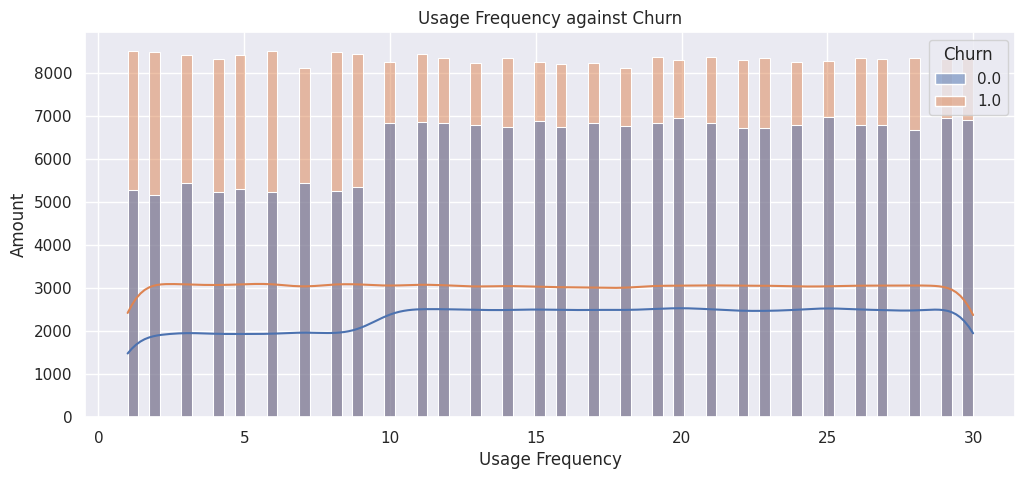

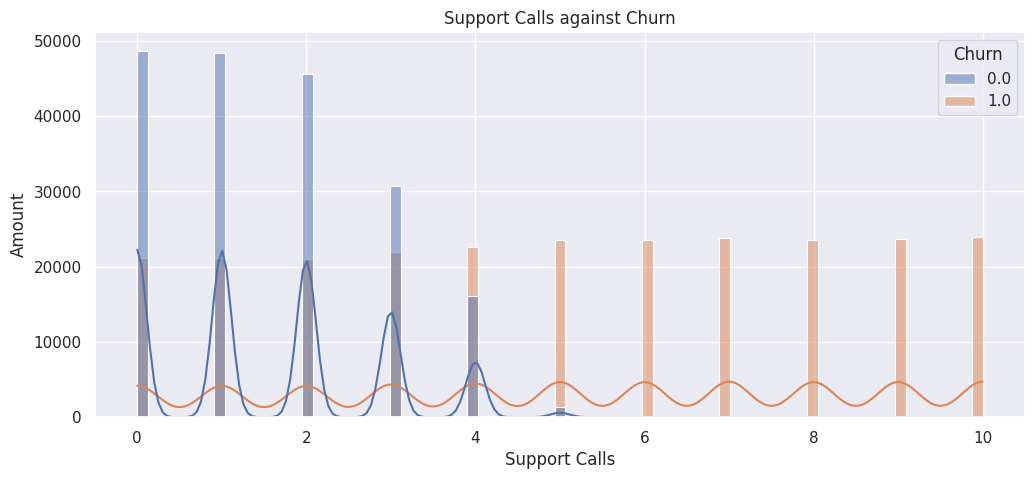

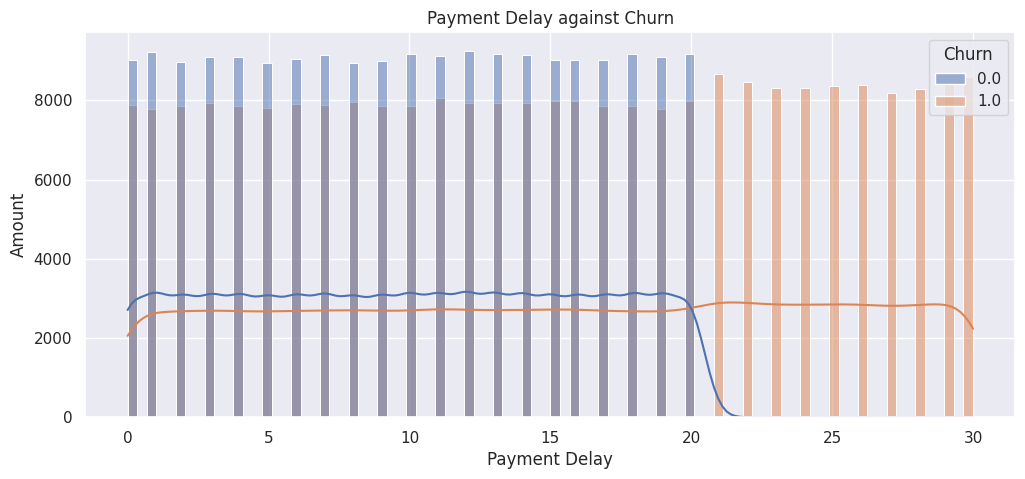

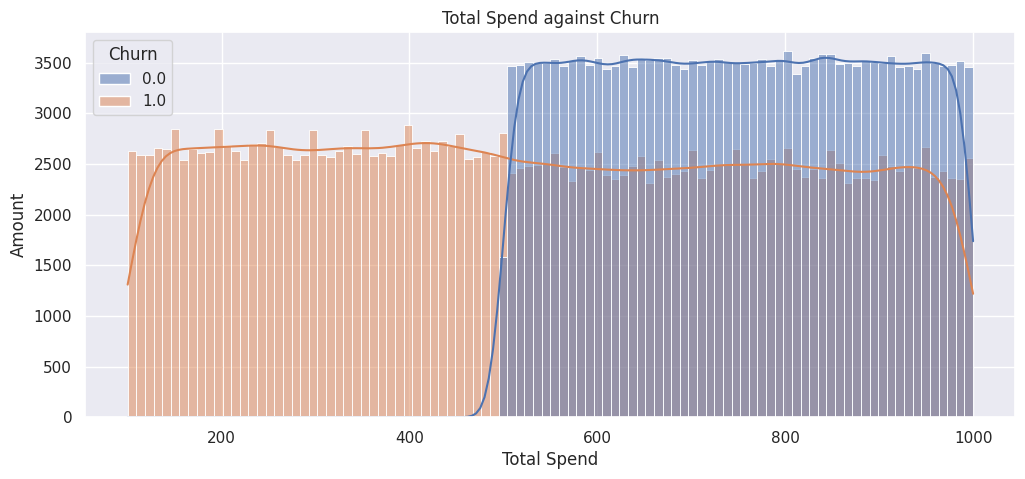

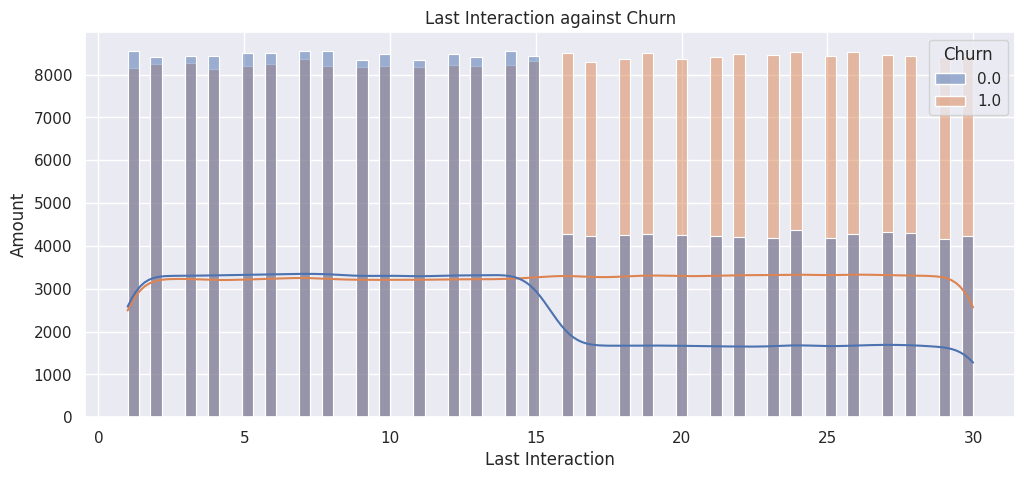

In [ ]:

cols  = trainDF.drop(columns='Churn').columns
cols = cols.drop('CustomerID')
cols = cols.drop('Gender')
cols = cols.drop('Subscription Type')
cols = cols.drop('Contract Length')



for col in cols:
    plt.figure(figsize=(12, 5))
    sns.histplot(data=trainDF, x=col, hue='Churn', kde=True)
    plt.title(f'{col} against Churn')
    plt.xlabel(col)
    plt.ylabel('Amount')
    plt.show()

**INSIGHTS**

1. Age vs. Churn
Younger customers have higher churn rates compared to older customers.
Older customers tend to be more loyal and have lower churn rates.
2. Tenure vs. Churn
Customers with shorter tenure are more likely to churn.
Longer tenure is associated with lower churn rates, indicating higher loyalty.
3. Usage Frequency vs. Churn
Lower usage frequency correlates with higher churn rates.
High usage frequency is a strong indicator of customer retention.
4. Support Calls vs. Churn
Increased support calls are associated with higher churn rates.
High support call frequency may indicate customer dissatisfaction.
5. Payment Delay vs. Churn
Customers with frequent payment delays show higher churn rates.
Prompt payment behavior is linked to customer retention.
6. Subscription Type vs. Churn
Basic subscription holders have the highest churn rates.
Premium subscription holders exhibit lower churn rates, indicating higher satisfaction and loyalty.
7. Contract Length vs. Churn
Short-term contract holders have higher churn rates.
Longer contracts correlate with lower churn rates, suggesting commitment to the service.
8. Total Spend vs. Churn
Lower total spend is linked to higher churn rates.
Customers with higher total spend are more likely to remain subscribed, possibly due to higher perceived value.
9. Last Interaction vs. Churn
Customers with a longer time since the last interaction are more likely to churn.
Frequent interactions are a positive sign of engagement and lower churn rates.

# **CORRELATION ANALYSIS**

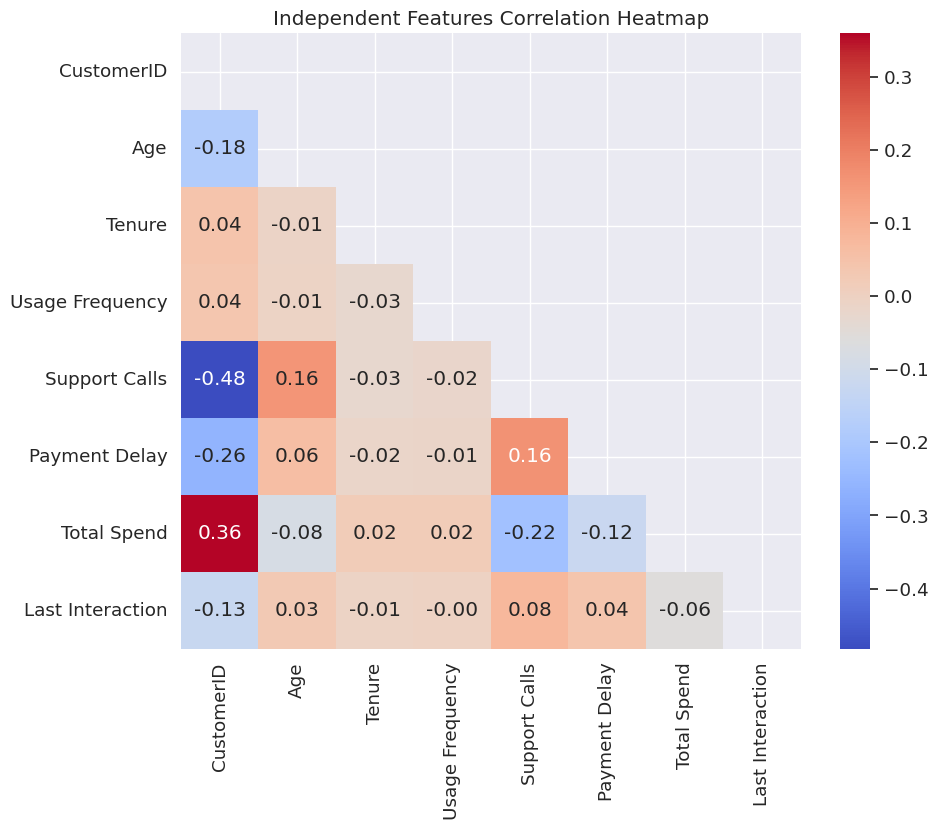

In [ ]:
featuresDF = trainDF.select_dtypes(include=['number']).copy().drop(columns=['Churn'])
corr_matrix = featuresDF.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Indepdendent Features Ccorrelation")
plt.show()




1.   Age and Tenure: Older customers might have longer tenures.
2.   Usage Frequency and Support Calls: Higher usage may correlate with increased support calls.
3. Payment Delay and Churn: Payment delays could be a significant indicator of churn.




**Checking for drift between the training and test datasets**

            Feature  KS Statistic
0               Age      0.146553
1   Usage Frequency      0.042062
2     Payment Delay      0.239355
3       Total Spend      0.201936
4  Last Interaction      0.067633


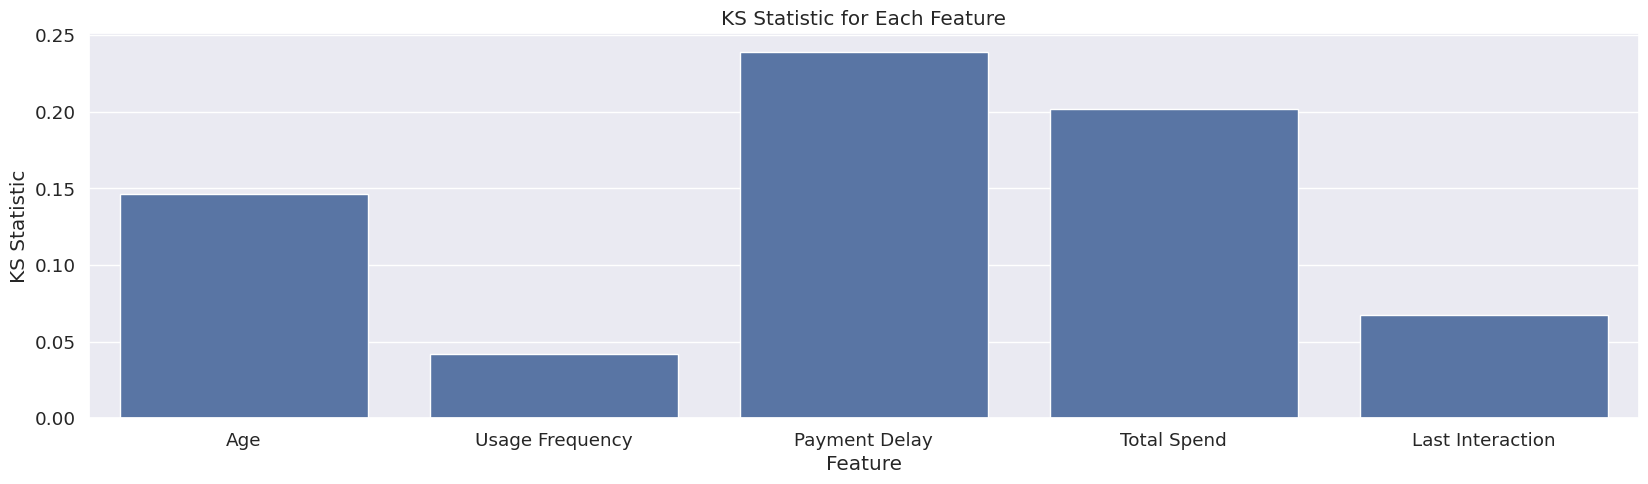

In [ ]:
from scipy.stats import ks_2samp
ks_results = []
for col in nums:
    ks_stat, p_value = ks_2samp(trainDF[col], testDF[col])
    ks_results.append((col, ks_stat))

ks_df = pd.DataFrame(ks_results, columns=['Feature', 'KS Statistic'])

print(ks_df)

plt.figure(figsize=(20, 5))
sns.barplot(x='Feature', y='KS Statistic', data=ks_df)
plt.title('KS Statistic for Each Feature')
plt.show()



The Kolmogorov-Smirnov (KS) statistic is a measure used to compare two samples (test and training datasets) and determine if they come from the same distribution. Definition: The KS statistic quantifies the maximum distance between the empirical cumulative distribution functions (ECDFs) of two samples.
Calculation: It is calculated as the maximum absolute difference between the ECDFs of the two samples. Interpretation: A higher KS statistic value indicates a greater difference between the two distributions, while a lower value suggests that the distributions are similar. As the lowest KS statistic of Usage Frequency is 0.05, there is an evident need to split the training and test data sets in a better way.
